**BMI Calculator Advanced Model**

In [2]:
!pip install tk matplotlib


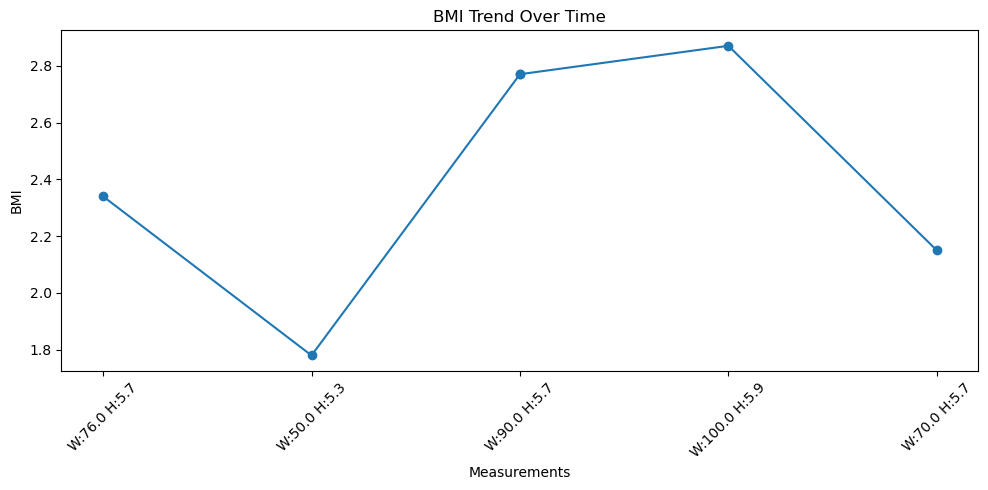

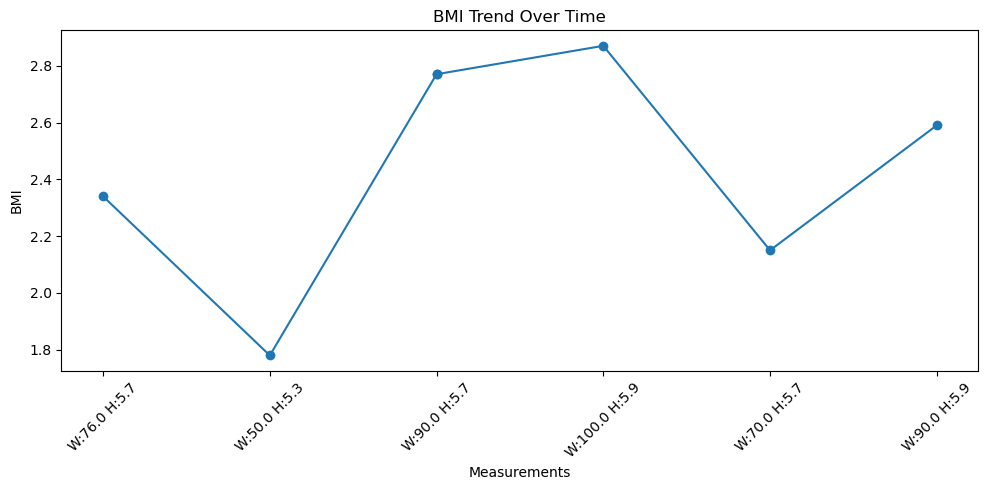

In [ ]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import os

class BMICalculator:
    def __init__(self, root):
        self.root = root
        self.root.title("BMI Calculator")

        self.weight_label = tk.Label(root, text="Weight (kg):")
        self.weight_label.pack()
        self.weight_entry = tk.Entry(root)
        self.weight_entry.pack()

        self.height_label = tk.Label(root, text="Height (m):")
        self.height_label.pack()
        self.height_entry = tk.Entry(root)
        self.height_entry.pack()

        self.calculate_button = tk.Button(root, text="Calculate BMI", command=self.calculate_bmi)
        self.calculate_button.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        self.history_button = tk.Button(root, text="View History", command=self.view_history)
        self.history_button.pack()

    def calculate_bmi(self):
        try:
            weight = float(self.weight_entry.get())
            height = float(self.height_entry.get())

            if weight <= 0 or height <= 0:
                raise ValueError("Weight and height must be positive numbers.")

            bmi = weight / (height ** 2)
            category = self.classify_bmi(bmi)
            result_text = f"Your BMI is: {bmi:.2f}\nCategory: {category}"
            self.result_label.config(text=result_text)
            
            self.save_result(weight, height, bmi, category)
        except ValueError as e:
            messagebox.showerror("Invalid input", str(e))

    def classify_bmi(self, bmi):
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 24.9:
            return "Normal weight"
        elif 25 <= bmi < 29.9:
            return "Overweight"
        else:
            return "Obesity"

    def save_result(self, weight, height, bmi, category):
        with open("bmi_history.txt", "a") as file:
            file.write(f"{weight},{height},{bmi:.2f},{category}\n")

    def view_history(self):
        if not os.path.exists("bmi_history.txt"):
            messagebox.showinfo("No history", "No history found.")
            return

        dates, bmis = [], []
        with open("bmi_history.txt", "r") as file:
            for line in file:
                weight, height, bmi, category = line.strip().split(",")
                dates.append(f"W:{weight} H:{height}")
                bmis.append(float(bmi))

        plt.figure(figsize=(10, 5))
        plt.plot(dates, bmis, marker='o')
        plt.xlabel("Measurements")
        plt.ylabel("BMI")
        plt.title("BMI Trend Over Time")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    root = tk.Tk()
    app = BMICalculator(root)
    root.mainloop()


In [ ]:
import threading

def start_tkinter_app():
    root = tk.Tk()
    app = BMICalculator(root)
    root.mainloop()

thread = threading.Thread(target=start_tkinter_app)
thread.start()


In [ ]:
IPython.display